<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/Maestria-IMCA/blob/main/Clase6_SistemasLineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAESTRIA DE MODELIZACION MATEMATICA Y COMPUTACIONAL
---
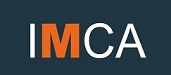


---


# CLASE: SISTEMAS LINEALES Y CALCULO DE VALORES PROPIOS

# METODO DE JACOBI

Supongamos que tenemos un sistema de ecuaciones lineales de la forma $Ax=b$, donde $A$ es la matriz de coeficientes, $x$ es el vector de incógnitas y $b$ es el vector de términos constantes. Se deseara que la matriz $A$ tenga la diagonal dominante, el cual es una propiedad la matriz. Es asi una matriz se considera diagonal dominante si, para cada fila de la matriz, el valor absoluto del elemento en la diagonal principal es mayor o igual que la suma de los valores absolutos de los elementos fuera de la diagonal en esa fila


1. Inicializa un vector de solución inicial $x^{(0)}$ con valores iniciales (pueden ser arbitrarios).

2. Para cada componente $x_i^{(k)}$ en la k-ésima iteración, utiliza la siguiente fórmula para actualizarla:

  $x_i^{(k+1)}=\dfrac{1}{A_{ii}}(b_i- \sum_{j≠i}^{n}​A_{ij}​x_j^{(k)})$

  Donde $A_{ij}$ es el elemento de la matriz $A$ en la fila $i$, columna $j$, $b_i$​ es el i-ésimo elemento del vector $b$, y $x_j^{(k)}$​ es el j-ésimo componente del vector de solución en la k-ésima iteración.

3. Repite el paso 2 hasta que se alcance una convergencia deseada o después de un número predefinido de iteraciones.

In [ ]:
#metodo Jacobi
import numpy as np
import pandas as pd

N=50 #numero maximo de iteraciones
tol=0.001 #toleracia

#inicializando matriz vacia
Resul=np.empty(shape=[0, 4])

A=np.array([[25,-0.9,-0.3],[3.7,-7.3,-0.1],[0.7,0.1,-8.2]],dtype='float')
b=np.array([20.2,-18.9,-56.4],dtype='float')
x=np.array([0,0,0],dtype='float')

print("matriz A: ")
print(A)
print("matriz b: ")
print(b)

n=len(b) #longitud de las soluciones
x1=np.zeros_like(x) #inicializamos con ceros el vector x1
iter=1 #inicializamos el vector iter

while iter<N:
  x1[:]=x #mantiene el vector x1 en las iteraciones
  #rellenando la matriz con los calculos
  row = np.array([iter, x1[0], x1[1],x[2]])
  Resul = np.vstack([Resul, row])
  for j in range(n):
    suma=0
    for i in range(n):
      if i==j:
        continue
      suma+=A[j,i]*x1[i]
    x[j]=(b[j]- suma)/A[j,j]
  iter+=1
  if(abs(np.linalg.norm(np.array(x),2)-np.linalg.norm(np.array(x1),2))<tol):
    break
row = np.array([iter, x[0], x[1],x[2]])
Resul = np.vstack([Resul, row])

#creacion de dataframe de los calculos
calculos= pd.DataFrame(Resul,columns=['n', 'x1', 'x2','x3'])
pp.pprint(calculos)
calculos=calculos.style.format("{:.8f}").hide()
calculos
print("La solucion del sistema de ecuacion sera x: ",x)
print("Numero de Iteraciones:",iter)
print("comprobacion A@x: ",A@x)

matriz A: 
[[25.  -0.9 -0.3]
 [ 3.7 -7.3 -0.1]
 [ 0.7  0.1 -8.2]]
matriz b: 
[ 20.2 -18.9 -56.4]
     n        x1        x2        x3
0  1.0  0.000000  0.000000  0.000000
1  2.0  0.808000  2.589041  6.878049
2  3.0  0.983742  2.904355  6.978598
3  4.0  0.996300  2.992053  6.997446
4  5.0  0.999683  2.998160  6.999587
5  6.0  0.999929  2.999845  6.999951
6  7.0  0.999994  2.999965  6.999992
La solucion del sistema de ecuacion sera x:  [0.99999383 2.99996459 6.99999203]
Numero de Iteraciones: 7
comprobacion A@x:  [ 20.19988002 -18.89976352 -56.39994253]


In [ ]:
import numpy as np
y=[2,3,5]
x=np.array(y)
np.linalg.norm(x,2)

6.164414002968976

In [ ]:
import numpy as np

#metodo Jacobi
A=np.array([[7,-6],[-8,9]],dtype='float')
b=np.array([3,-4],dtype='float')
x=np.array([0,0],dtype='float')
print(A)
print(b)

n=len(b)


for k in range(50):
  for j in range(n):
    suma=0
    for i in range(n):
      if i==j:
        continue
      suma+=A[j,i]*x[i]
    x[j]=(b[j]- suma)/A[j,j]
  #print(x)

print(A@x)

# METODO DE POTENCIA

In [173]:
#impresion de resultados
import numpy as np
def imprime(iter,a,r):
  longi=len(a)
  cad1='print("{:>5,.0f} '
  cad2='.format(iter,'
  for i in range(longi):
    cad1=cad1+'{:>30,.3f}'
    cad2=cad2+'a['+str(i)+']'
    if(i!=(longi-1)):
      cad2=cad2+','
      cad1=cad1+' '
    else:
      cad2=cad2+',r))'
      cad1=cad1+' {:>20,.10f}"'
  eval(cad1+cad2)

def cabezera(a):
  longi=len(a)
  cad1='print("{:^5} '
  cad2='.format("iteracion",'
  for i in range(longi):
    cad1=cad1+'{:^30}'
    cad2=cad2+'"'+'x['+str(i)+']'+'"'
    if(i!=(longi-1)):
      cad2=cad2+','
      cad1=cad1+' '
    else:
      cad2=cad2+',"eigenvalor"))'
      cad1=cad1+' {:^20}"'
  eval(cad1+cad2)

In [174]:
#metodo de la potencia
import numpy as np
from numpy.linalg import eig
A=np.array([[-2,-3],[6,7]],dtype='float')
x=np.array([1,1],dtype='float')#inicializamos el proceso con un vector no nulo

#A=np.array([[1,2,-1],[1,0,1],[4,-4,5]],dtype='float')
#x=np.array([1,0,0],dtype='float')

def phi(x):
  return max(np.absolute(x))
  #return x[0]

print("########    METODO DE LA POTENCIA PARA CALCULO DE VALOR PROPIO DOMINANTE    ########\n")
cabezera(x)
for i in range(15):
  x0=x
  x=A@x
  r=phi(x)/phi(x0)
  #print('%d %11.2f %11.2f \n',i,x,r)
  imprime(i+1,x,r)
  #print(x)

print("Valor propio: ",r)
print("vector propio: ",x/np.min(x))
print("Usando Linealg eig\n", eig(A))


########    METODO DE LA POTENCIA PARA CALCULO DE VALOR PROPIO DOMINANTE    ########

iteracion              x[0]                           x[1]                   eigenvalor     
    1                         -5.000                         13.000        13.0000000000
    2                        -29.000                         61.000         4.6923076923
    3                       -125.000                        253.000         4.1475409836
    4                       -509.000                      1,021.000         4.0355731225
    5                     -2,045.000                      4,093.000         4.0088148874
    6                     -8,189.000                     16,381.000         4.0021988761
    7                    -32,765.000                     65,533.000         4.0005494170
    8                   -131,069.000                    262,141.000         4.0001373354
    9                   -524,285.000                  1,048,573.000         4.0000343327
   10               

In [192]:
import numpy as np
a=np.array([2,-13.5,13.,8.,-1.])
iter=5
r=2.003
print(a)
cabezera(a)
imprime(iter,a,r)
A=np.array([[3,4,-1],[2,0,1],[1,3,-2]],dtype='float')
print(A)
B=np.linalg.inv(A)
print(B)
print(A@B)
print(np.matmul(A,B))

[  2.  -13.5  13.    8.   -1. ]
iteracion              x[0]                           x[1]                           x[2]                           x[3]                           x[4]                   eigenvalor     
    5                          2.000                        -13.500                         13.000                          8.000                         -1.000         2.0030000000
[[ 3.  4. -1.]
 [ 2.  0.  1.]
 [ 1.  3. -2.]]
[[-0.6  1.   0.8]
 [ 1.  -1.  -1. ]
 [ 1.2 -1.  -1.6]]
[[ 1.00000000e+00 -3.33066907e-16 -2.22044605e-16]
 [ 2.22044605e-16  1.00000000e+00 -4.44089210e-16]
 [ 0.00000000e+00 -2.22044605e-16  1.00000000e+00]]
[[ 1.00000000e+00 -3.33066907e-16 -2.22044605e-16]
 [ 2.22044605e-16  1.00000000e+00 -4.44089210e-16]
 [ 0.00000000e+00 -2.22044605e-16  1.00000000e+00]]


# METODO DE POTENCIA NORMALIZADA

In [203]:
#impresion de resultados
import numpy as np
def imprime(iter,a,r):
  longi=len(a)
  cad1='print("{:>5,.0f} '
  cad2='.format(iter,'
  for i in range(longi):
    cad1=cad1+'{:>30,.10f}'
    cad2=cad2+'a['+str(i)+']'
    if(i!=(longi-1)):
      cad2=cad2+','
      cad1=cad1+' '
    else:
      cad2=cad2+',r))'
      cad1=cad1+' {:>20,.10f}"'
  eval(cad1+cad2)

def cabezera(a):
  longi=len(a)
  cad1='print("{:^5} '
  cad2='.format("iteracion",'
  for i in range(longi):
    cad1=cad1+'{:^30}'
    cad2=cad2+'"'+'x['+str(i)+']'+'"'
    if(i!=(longi-1)):
      cad2=cad2+','
      cad1=cad1+' '
    else:
      cad2=cad2+',"eigenvalor"))'
      cad1=cad1+' {:^20}"'
  eval(cad1+cad2)

In [208]:
#metodo de la potencia normalizada
import numpy as np
from numpy.linalg import eig
from numpy.linalg import norm

A=np.array([[-4,14,0],[-5,13,0],[-1,0,2]],dtype='float')
x=np.array([1,1,1],dtype='float')


#A=np.array([[6,5,-5],[2,6,-2],[2,5,-1]],dtype='float')
#x=np.array([-1,1,1],dtype='float')

#A=np.array([[-1,0],[-1,-3]],dtype='float')
#x=np.array([1,1],dtype='float')

#A=np.array([[1,2,-1],[1,0,1],[4,-4,5]],dtype='float')
#x=np.array([1,0,0],dtype='float')

#A=np.array([[-2,-3],[6,7]],dtype='float')
#x=np.array([1,1],dtype='float')#inicializamos el proceso con un vector no nulo

print("METODO DE LA POTENCIA NORMALIZADA PARA CALCULO DE VALOR PROPIO DOMINANTE\n")
def phi(x):
  #return x[1]
  return max(np.absolute(x))
cabezera(x)
for i in range(20):
  x0=x
  x=A@x
  r=phi(x)/phi(x0)
  x /=norm(x)
  #print(x,r)
  imprime(i+1,x,r)

print("Valor propio: ",r)
print("vector propio: ",x)
print("Usando eig\n", eig(A))


METODO DE LA POTENCIA NORMALIZADA PARA CALCULO DE VALOR PROPIO DOMINANTE

iteracion              x[0]                           x[1]                           x[2]                   eigenvalor     
    1                   0.7784989442                   0.6227991553                   0.0778498944        10.0000000000
    2                   0.7968581126                   0.5976435844                  -0.0885397903         7.2000000000
    3                   0.7982443818                   0.5833324329                  -0.1500972342         6.5000000000
    4                   0.7979903505                   0.5763263643                  -0.1762365520         6.2307692308
    5                   0.7977209134                   0.5729086560                  -0.1881940920         6.1111111111
    6                   0.7975636051                   0.5712279874                  -0.1938836821         6.0545454545
    7                   0.7974818465                   0.5703962086               

# METODO DE LA POTENCIA NORMALIZADA INVERSA

In [209]:
#impresion de resultados
import numpy as np
def imprime(iter,a,r):
  longi=len(a)
  cad1='print("{:>5,.0f} '
  cad2='.format(iter,'
  for i in range(longi):
    cad1=cad1+'{:>30,.10f}'
    cad2=cad2+'a['+str(i)+']'
    if(i!=(longi-1)):
      cad2=cad2+','
      cad1=cad1+' '
    else:
      cad2=cad2+',r))'
      cad1=cad1+' {:>20,.10f}"'
  eval(cad1+cad2)

def cabezera(a):
  longi=len(a)
  cad1='print("{:^5} '
  cad2='.format("iteracion",'
  for i in range(longi):
    cad1=cad1+'{:^30}'
    cad2=cad2+'"'+'x['+str(i)+']'+'"'
    if(i!=(longi-1)):
      cad2=cad2+','
      cad1=cad1+' '
    else:
      cad2=cad2+',"eigenvalor"))'
      cad1=cad1+' {:^20}"'
  eval(cad1+cad2)

In [211]:
#metodo de la potencia normalizada inversa
import numpy as np
from numpy.linalg import eig
from numpy.linalg import norm


A=np.array([[-4,14,0],[-5,13,0],[-1,0,2]],dtype='float')
x=np.array([1,1,1],dtype='float')

#A=np.array([[6,5,-5],[2,6,-2],[2,5,-1]],dtype='float')
#x=np.array([-1,1,1],dtype='float')

#A=np.array([[-1,0],[-1,-3]],dtype='float')
#x=np.array([1,1],dtype='float')

#A=np.array([[1,2,-1],[1,0,1],[4,-4,5]],dtype='float')
#x=np.array([1,0,0],dtype='float')

#A=np.array([[-2,-3],[6,7]],dtype='float')
#x=np.array([1,1],dtype='float')#inicializamos el proceso con un vector no nulo

B=np.linalg.inv(A)
print("METODO DE LA POTENCIA NORMALIZADA INVERSA PARA CALCULO DE VALOR PROPIO DOMINANTE\n")
def phi(x):
  return max(np.absolute(x))
  #return x[1]
cabezera(x)
for i in range(20):
  x0=x
  x=B@x
  r=phi(x)/phi(x0)
  x /=norm(x)
  #print(x,r)
  imprime(i+1,x,r)

print("Valor propio: ",1/r)
print("vector propio: ",x)
print("Usando eig\n", eig(A))


METODO DE LA POTENCIA NORMALIZADA INVERSA PARA CALCULO DE VALOR PROPIO DOMINANTE

iteracion              x[0]                           x[1]                           x[2]                   eigenvalor     
    1                  -0.1160517706                   0.1160517706                   0.9864400504         0.4722222222
    2                  -0.3905667329                  -0.1301889110                   0.9113223769         0.4117647059
    3                  -0.4354416202                  -0.1915943129                   0.8795920729         0.4007936508
    4                  -0.4123619682                  -0.1953293534                   0.8898337209         0.4059405941
    5                  -0.3594855483                  -0.1752863417                   0.9165396003         0.4180216802
    6                  -0.2937082587                  -0.1450848025                   0.9448205432         0.4327390600
    7                  -0.2271487210                  -0.1128996613       

# METODO DE POTENCIA NORMALIZADA CON DESPLAZAMIENTO

In [218]:
#impresion de resultados
import numpy as np
def imprime(iter,a,r):
  longi=len(a)
  cad1='print("{:>5,.0f} '
  cad2='.format(iter,'
  for i in range(longi):
    cad1=cad1+'{:>30,.10f}'
    cad2=cad2+'a['+str(i)+']'
    if(i!=(longi-1)):
      cad2=cad2+','
      cad1=cad1+' '
    else:
      cad2=cad2+',r))'
      cad1=cad1+' {:>20,.10f}"'
  eval(cad1+cad2)

def cabezera(a):
  longi=len(a)
  cad1='print("{:^5} '
  cad2='.format("iteracion",'
  for i in range(longi):
    cad1=cad1+'{:^30}'
    cad2=cad2+'"'+'x['+str(i)+']'+'"'
    if(i!=(longi-1)):
      cad2=cad2+','
      cad1=cad1+' '
    else:
      cad2=cad2+',"eigenvalor"))'
      cad1=cad1+' {:^20}"'
  eval(cad1+cad2)

In [219]:
#metodo de la potencia normalizada desplazada u=5
import numpy as np
from numpy.linalg import eig
from numpy.linalg import norm

A=np.array([[-4,14,0],[-5,13,0],[-1,0,2]],dtype='float')
x=np.array([1,1,1],dtype='float')

#A=np.array([[6,5,-5],[2,6,-2],[2,5,-1]],dtype='float')
#x=np.array([-1,1,1],dtype='float')

#A=np.array([[-1,0],[-1,-3]],dtype='float')
#x=np.array([1,1],dtype='float')

#A=np.array([[1,2,-1],[1,0,1],[4,-4,5]],dtype='float')
#x=np.array([1,0,0],dtype='float')

#A=np.array([[-2,-3],[6,7]],dtype='float')
#x=np.array([1,1],dtype='float')#inicializamos el proceso con un vector no nulo
u=5
B=np.identity(len(A),dtype='float')
A=A-u*B
print("METODO DE LA POTENCIA NORMALIZADA PARA CALCULO DE VALOR PROPIO DOMINANTE\n")
def phi(x):
  #return x[1]
  return max(np.absolute(x))
cabezera(x)
for i in range(20):
  x0=x
  x=A@x
  r=phi(x)/phi(x0)
  x /=norm(x)
  #print(x,r)
  imprime(i+1,x,r)

print("Valor propio: ",r)
print("vector propio: ",x)
print("Usando eig\n", eig(A))


METODO DE LA POTENCIA NORMALIZADA PARA CALCULO DE VALOR PROPIO DOMINANTE

iteracion              x[0]                           x[1]                           x[2]                   eigenvalor     
    1                   0.7071067812                   0.4242640687                  -0.5656854249         5.0000000000
    2                  -0.3905667329                  -0.1301889110                   0.9113223769         1.4000000000
    3                   0.5583978135                   0.3006757457                  -0.7731662033         2.5714285714
    4                  -0.4123619682                  -0.1953293534                   0.8898337209         2.2777777778
    5                   0.3891766812                   0.1989125259                  -0.8994305520         2.5365853659
    6                  -0.2937082587                  -0.1450848025                   0.9448205432         2.5673076923
    7                   0.2326349164                   0.1169898134               

In [253]:
c=np.array([4,-1,-7,3,5],dtype='float')
tupla=np.where(c==np.amax(c))
pos=tupla[0]
pos=pos[0]


In [ ]:
#metodo de la potencia simetrica
import numpy as np
from numpy.linalg import eig
from numpy.linalg import norm

A=np.array([[4,-1,1],[-1,3,-2],[1,-2,3]],dtype='float')
x=np.array([1,0,0],dtype='float')


for i in range(20):
  x0=x
  x=A@x

  r=(x0 @ x)/(x0 @ x0)
  x /=norm(x,np.inf)
  print(x,r)
print("Usando eig\n", eig(A))


[ 1.   -0.25  0.25] 4.0
[ 1.  -0.5  0.5] 5.0
[ 1.  -0.7  0.7] 5.666666666666667
[ 1.         -0.83333333  0.83333333] 5.90909090909091
[ 1.         -0.91176471  0.91176471] 5.976744186046512
[ 1.         -0.95454545  0.95454545] 5.994152046783625
[ 1.         -0.97692308  0.97692308] 5.998535871156662
[ 1.         -0.98837209  0.98837209] 5.9996338337605275
[ 1.         -0.99416342  0.99416342] 5.9999084500595075
[ 1.         -0.99707602  0.99707602] 5.999977111991028
[ 1.         -0.99853659  0.99853659] 5.999994277965015
[ 1.         -0.99926794  0.99926794] 5.999998569489208
[ 1.         -0.99963388  0.99963388] 5.999999642372173
[ 1.         -0.99981692  0.99981692] 5.9999999105930355
[ 1.         -0.99990845  0.99990845] 5.999999977648258
[ 1.         -0.99995423  0.99995423] 5.999999994412064
[ 1.         -0.99997711  0.99997711] 5.999999998603016
[ 1.         -0.99998856  0.99998856] 5.999999999650754
[ 1.         -0.99999428  0.99999428] 5.9999999999126885
[ 1.         -0.99999